In [56]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from simulation import *

In [57]:
# parameters
num_devices = [5, 6, 7, 8]
message_length_bits = 116
baud_rate = [4800, 6400, 8000]
sim_duration = [0.5, 0.75, 1, 1.5, 2]  # seconds
min_interval = [0, 0.05, 0.1]
max_interval = [0.2, 0.5, 0.75, 1]
num_simulations = 1000

data = []
for n in num_devices:
    for baud in baud_rate:
        for duration in sim_duration:
            for min in min_interval:
                for max in max_interval:
                    num_heard = simulate_num_heard(
                        n,
                        message_length_bits,
                        baud,
                        duration,
                        min,
                        max,
                        num_simulations,
                    )
                    data.append(
                        [
                            n,
                            message_length_bits,
                            baud,
                            duration,
                            min,
                            max,
                            round(np.mean(num_heard), 4),
                        ]
                    )


cols = [
    "num devices",
    "message length (bits)",
    "baud rate (bits/sec)",
    "duration (sec)",
    "min delay (sec)",
    "max delay (sec)",
    "average messages heard",
]
df = pd.DataFrame(data, columns=cols)
df_corr = df.drop(columns="message length (bits)")

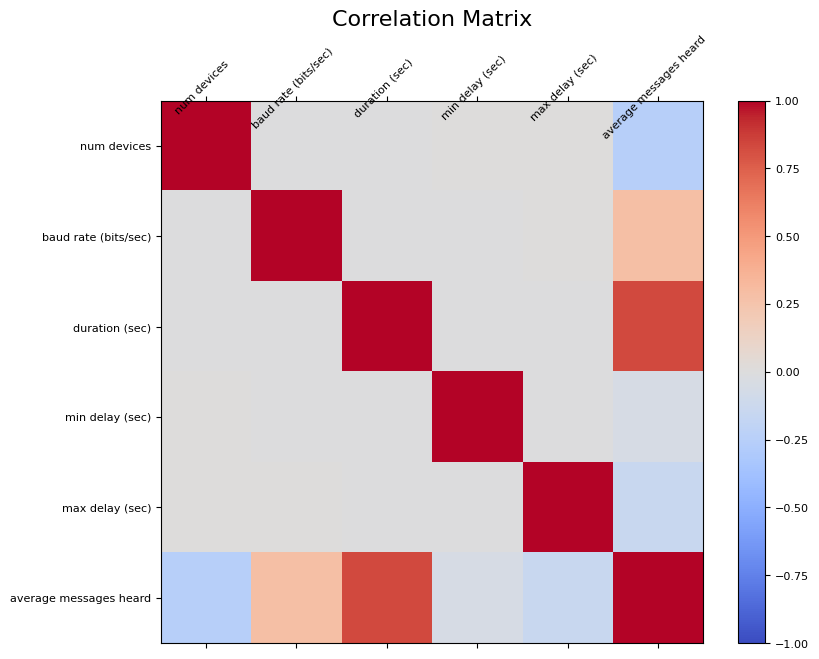

In [58]:
f = plt.figure(figsize=(9, 7))
plt.matshow(df_corr.corr(), fignum=f.number, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(
    range(df_corr.select_dtypes(["number"]).shape[1]),
    df_corr.select_dtypes(["number"]).columns,
    fontsize=8,
    rotation=45,
    wrap=True,
)
plt.yticks(
    range(df_corr.select_dtypes(["number"]).shape[1]),
    df_corr.select_dtypes(["number"]).columns,
    fontsize=8,
    wrap=True,
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

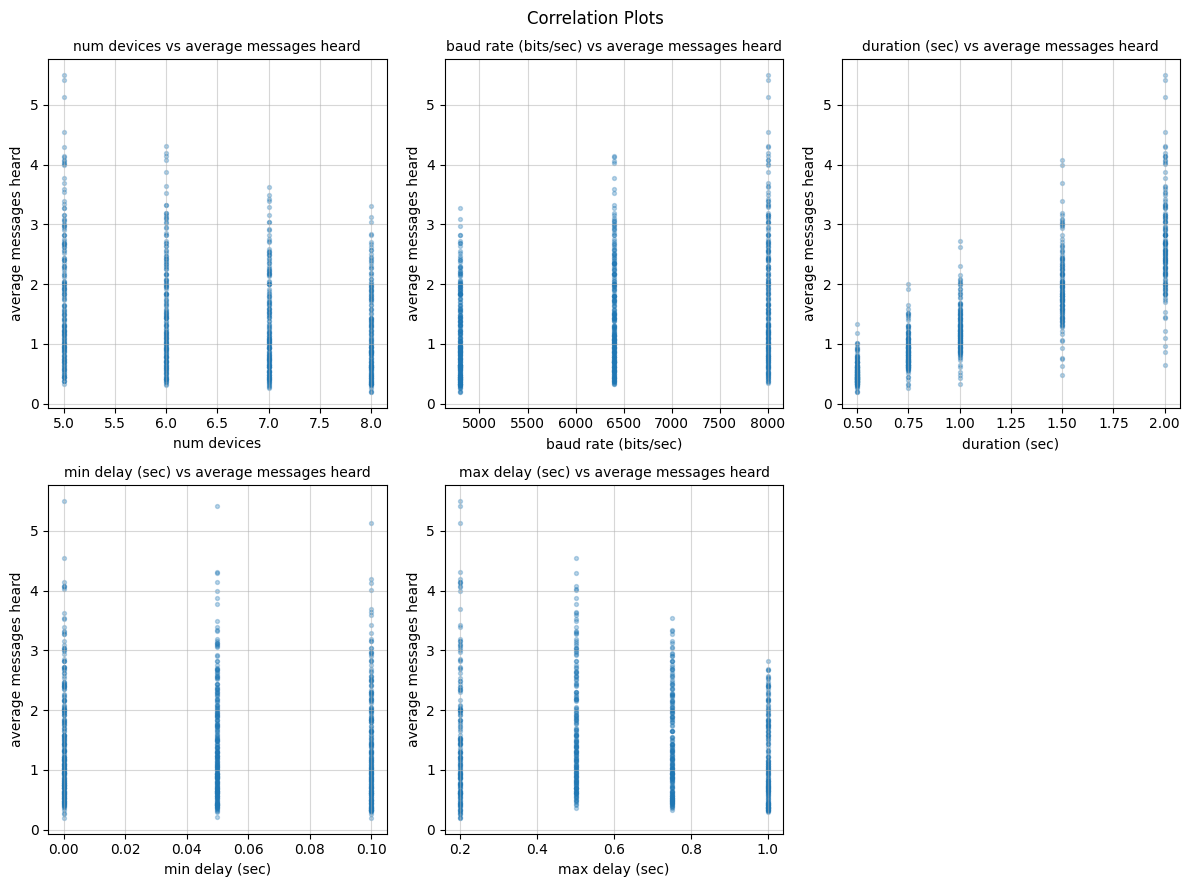

In [66]:
plot_cols = [
    "num devices",
    "baud rate (bits/sec)",
    "duration (sec)",
    "min delay (sec)",
    "max delay (sec)",
]
avg_col = "average messages heard"
j_ = 3
i_ = np.ceil(len(plot_cols) / j_).astype(int)
fig, ax = plt.subplots(i_, j_, figsize=(12, 9))
for id, c in enumerate(plot_cols):
    i = id // j_
    j = id % j_
    ax[i, j].scatter(df_corr[c], df_corr[avg_col], s=8, alpha=0.3)
    ax[i, j].set_title(f"{c} vs {avg_col}", fontsize=10)
    ax[i, j].set_xlabel(f"{c}")
    ax[i, j].set_ylabel(f"{avg_col}")
    ax[i, j].grid(alpha=0.5)

fig.delaxes(ax[1, 2])  # delete unused subplot
plt.suptitle("Correlation Plots")
plt.tight_layout()
plt.show()